In [1]:
import numpy as np
import scanpy as sc
import Acceleration as Ace
import scvelo as scv
import MyCodePloting as mc
import MyCodeTools as mt
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-04-27 15:24.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.read("D:/ISI/4th Sem/Dissertation/Data/Haber_et_al.loom", cache=True)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.tsne(adata)
adata

         Falling back to preprocessing with `sc.pp.pca` and default params.


AnnData object with n_obs × n_vars = 7216 × 27998
    obs: 'Bamfile', 'Barcode', 'Celltype', 'Maintype', 'Subsubtype', 'Subtype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [4]:
adata

AnnData object with n_obs × n_vars = 7216 × 27998
    obs: 'Bamfile', 'Barcode', 'Celltype', 'Maintype', 'Subsubtype', 'Subtype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

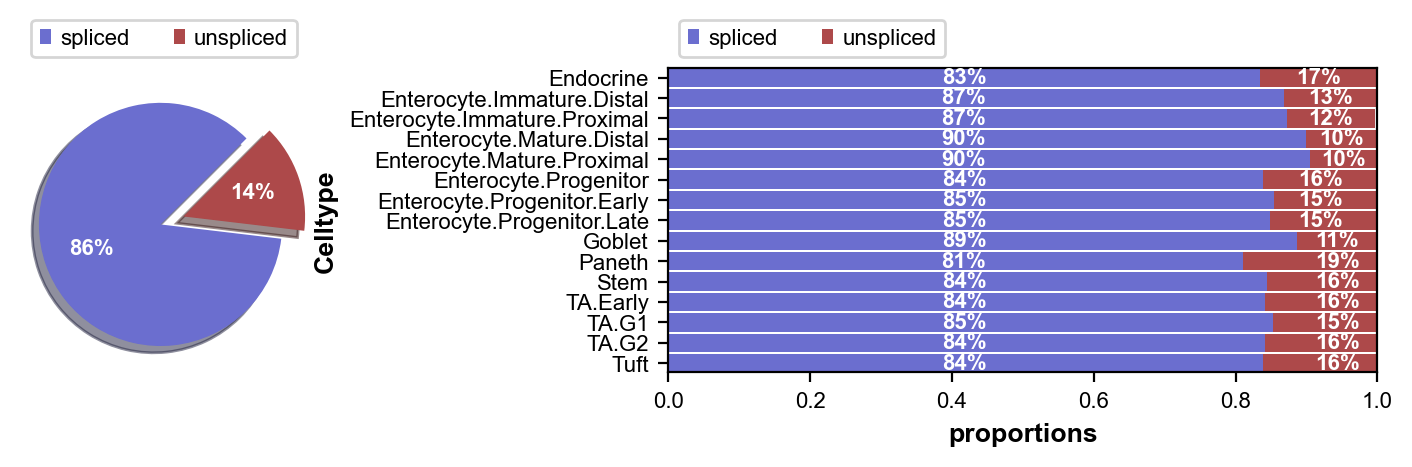

In [5]:
scv.pl.proportions(adata,groupby='Celltype')

In [6]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 21672 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [7]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 206 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
Spliced = adata.to_df(layer='Ms')
Unspliced = adata.to_df(layer='Mu')

In [9]:
scv.tl.velocity(adata)
gamma = adata.var['velocity_gamma']
acc = Unspliced - (1+gamma)*Unspliced + (gamma**2)*Spliced   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


Gene,Cops5,Ncoa2,Rpl7,Smap1,Uggt1,Tmem131,2010300C02Rik,Rnf149,Fhl2,Wdr12,...,Ocrl,Nsdhl,Dkc1,Heph,Igbp1,Taf1,Pbdc1,Diaph2,Huwe1,Smc1a
CellID,,,,,,,,,,,,,,,,,,,,,
Atlas5:ATCACTACCGCCTTx,0.000020,-0.024555,-2.549512e-05,-0.000210,-0.000362,-0.001631,-0.004140,-1.440421e-04,0.000194,-0.000988,...,-0.000738,0.000107,4.825893e-07,-0.008773,-0.000149,-0.002608,0.000258,-0.004094,-0.008468,-0.000700
Atlas5:AGCTGCCTAGGCGAx,-0.000114,-0.020786,7.211774e-07,-0.001402,0.000792,-0.001606,0.000675,1.056490e-06,-0.001218,-0.000139,...,-0.000376,0.000006,2.767709e-07,-0.016494,0.000014,-0.001146,0.000016,-0.004366,-0.002526,-0.001080
Atlas5:CAAGACTGTAGACCx,-0.000155,-0.048094,-1.709545e-05,-0.004591,0.002141,-0.001425,0.001050,2.444383e-06,-0.002654,0.000005,...,-0.002216,0.000012,6.563422e-07,-0.004961,-0.000225,0.000258,0.000198,-0.002360,-0.010846,-0.006024
Atlas5:ACGTTTACAGAGGCx,0.000012,-0.020695,-2.818400e-05,-0.002295,0.001985,-0.000501,0.001207,-4.636383e-05,-0.001218,0.000003,...,-0.000487,0.000068,9.581152e-07,-0.016810,-0.000179,-0.000593,-0.000890,-0.005189,0.001236,-0.001827
Atlas5:ATAGGCTGGTGAGGx,0.000015,-0.032206,-3.985073e-06,-0.000844,-0.001337,-0.001047,-0.000020,-1.369673e-04,0.000758,-0.000600,...,-0.000703,0.000057,7.682488e-07,-0.013855,0.000032,-0.008342,0.000327,-0.000618,-0.030639,-0.001203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Atlas2:TTCAGTTGTACAGCx,0.000030,-0.079108,4.445097e-07,-0.005131,-0.004346,-0.000691,-0.008067,5.576080e-07,-0.007959,-0.001194,...,0.000000,-0.000662,-9.662068e-06,-0.001976,0.000027,0.000197,-0.000272,0.000010,-0.022115,-0.001105
Atlas2:TTCAAGCTGAATGAx,-0.000032,-0.064927,-2.184020e-06,-0.005622,-0.004226,-0.000546,-0.001688,-1.022241e-04,-0.002265,-0.000147,...,-0.002413,-0.000264,-2.852702e-05,-0.001363,-0.000075,-0.004831,0.000102,-0.003960,-0.000668,-0.000568
Atlas2:TTTCAGTGCTCAAGx,-0.000100,-0.041791,1.650297e-07,-0.003312,0.004856,-0.000252,-0.009126,1.346696e-06,0.000579,0.000012,...,0.000031,-0.001708,1.581873e-06,-0.002080,0.000022,0.000637,0.000109,-0.004540,-0.027225,-0.001223


In [10]:
adata.layers['acc'] = acc
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/7216 [00:00<?, ?cells/s]

    finished (0:01:03) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:02) --> added
    'acc_tsne', embedded acc vectors (adata.obsm)


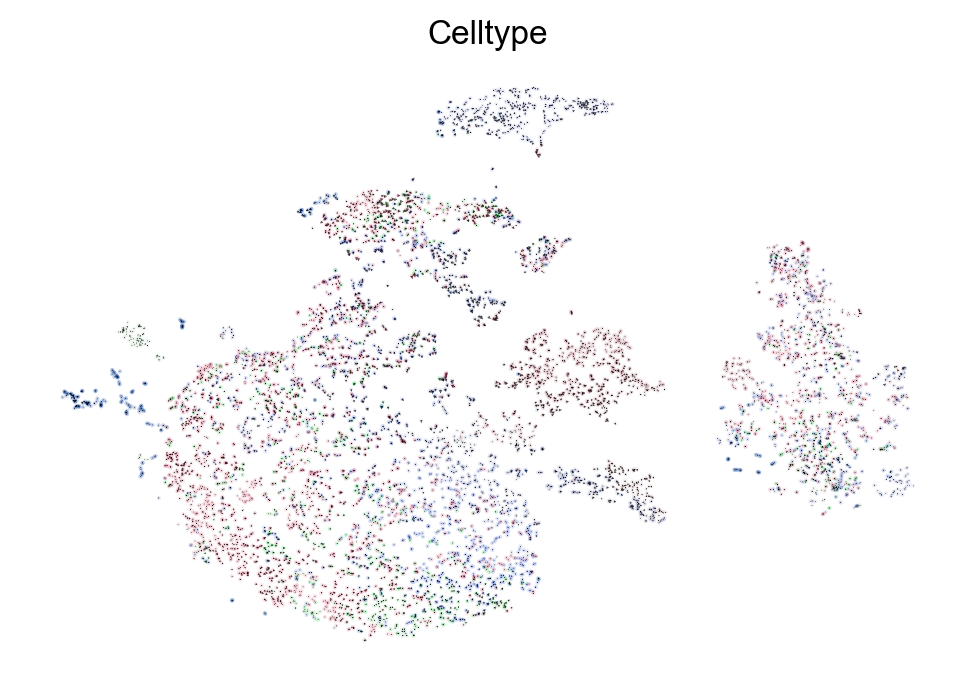

In [11]:
mc.acc_embedding(adata, basis='tsne', color="Celltype")

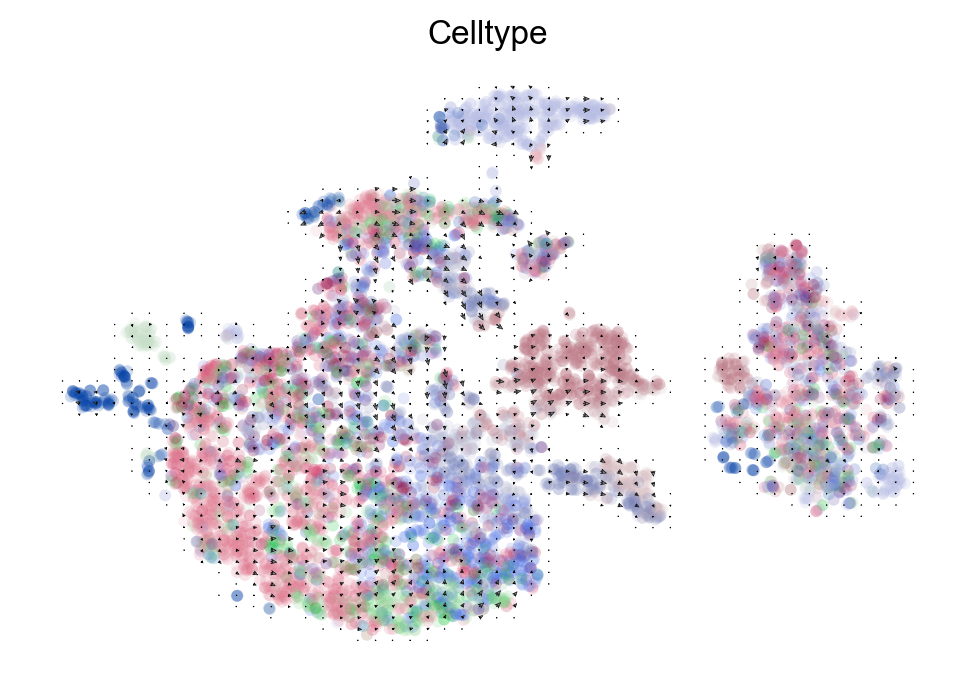

In [12]:
mc.acc_embedding_grid(adata, basis='tsne', color="Celltype")

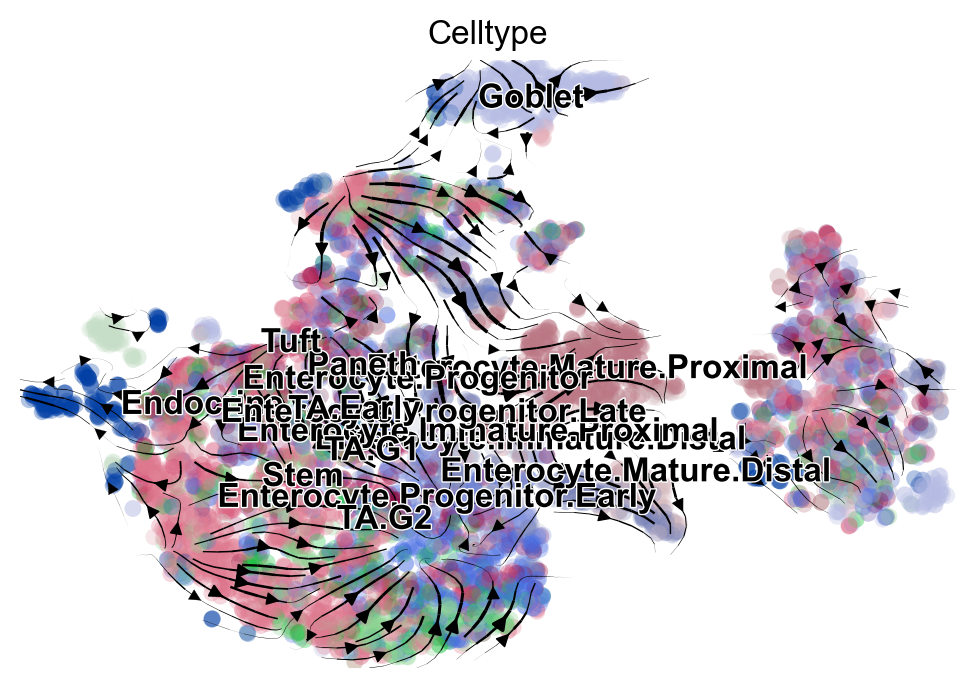

In [13]:
mc.acc_embedding_stream(adata, basis='tsne', color="Celltype")

computing acc embedding
    finished (0:00:02) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


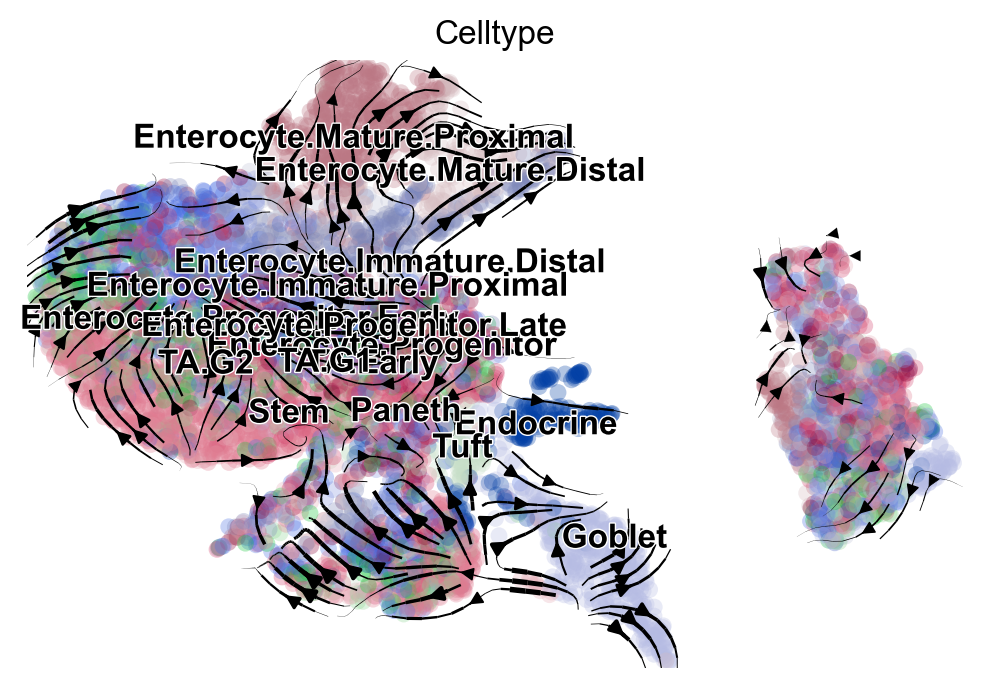

In [14]:
mc.acc_embedding_stream(adata, basis='umap', color="Celltype")